#### 321 new to 543 old in train
#### 32 new valdate  69 old validate

###update these numbers, more added

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

##Not Pretrained

In [ ]:
import os
%load_ext autoreload

## Setup environment specific requirements and set paths. This is to accommodate
## running from Google Colab or from a local directory

if( os.path.isdir("/content") ):
  # Setup Specific to Google Colab Environment

  print("Running from Google Colab Environment")

  !pip install requests
  !pip install requests-oauthlib
  !pip install ratelimit

  from google.colab import drive
  drive.mount('/content/drive')


  %cd "/content/drive/My Drive/Colab Notebooks/COMP6125 (2023)/Lab Exercises/Assignment 3/Project_Folder/data"

  sourceDirectory = %pwd
  sourceDirectory = sourceDirectory + "/"
  executionEnvDirectory = '/content'

else:
  # Setup Specific to Local Jupyter Environment

  print('Running from Local Jupyter Environment')

  sourceDirectory = "./"
  executionEnvDirectory = "./"

Running from Google Colab Environment
  Preparing metadata (setup.py) ... done
  Created wheel for ratelimit: filename=ratelimit-2.2.1-py3-none-any.whl size=5894 sha256=633be30f45bd579a94de3a7a426e7fe7c33b80a79ee7e5a003b2b5f72c9b151a
  Stored in directory: /root/.cache/pip/wheels/27/5f/ba/e972a56dcbf5de9f2b7d2b2a710113970bd173c4dcd3d2c902
Successfully built ratelimit
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/COMP6125 (2023)/Lab Exercises/Assignment 3/JMD Data/data


In [ ]:
import os
#import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#local_zip = '/tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

# Define our example directories and files
base_dir = './data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')

# Directory with our training cat pictures
train_new_dir = os.path.join(train_dir, 'new')

# Directory with our training dog pictures
train_old_dir = os.path.join(train_dir, 'old')

# Directory with our validation cat pictures
validation_new_dir = os.path.join(validation_dir, 'new')

# Directory with our validation dog pictures
validation_old_dir = os.path.join(validation_dir, 'old')

train_new_fnames = os.listdir(train_new_dir)
train_old_fnames = os.listdir(train_old_dir)

validation_new_fnames = os.listdir(validation_new_dir)
validation_old_fnames = os.listdir(validation_old_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

#train_generator = train_generator.repeat()

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1656 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)


x = layers.Dense(64, activation='relu')(x)


x = layers.Dense(32, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model_m = Model(img_input, output)
model_m.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc',"AUC"])

In [ ]:
history = model_m.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=4,
      verbose=2)

<ipython-input-46-ae6f1c786660>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_m.fit_generator(


Epoch 1/50
10/10 - 38s - loss: 0.7069 - acc: 0.4700 - auc: 0.4335 - val_loss: 0.6808 - val_acc: 0.5859 - val_auc: 0.4886 - 38s/epoch - 4s/step
Epoch 2/50
10/10 - 17s - loss: 0.6696 - acc: 0.6200 - auc: 0.5478 - val_loss: 0.6531 - val_acc: 0.6484 - val_auc: 0.5924 - 17s/epoch - 2s/step
Epoch 3/50
10/10 - 14s - loss: 0.6843 - acc: 0.5800 - auc: 0.5117 - val_loss: 0.6964 - val_acc: 0.5781 - val_auc: 0.5215 - 14s/epoch - 1s/step
Epoch 4/50
10/10 - 13s - loss: 0.7084 - acc: 0.4900 - auc: 0.4733 - val_loss: 0.6798 - val_acc: 0.5859 - val_auc: 0.7455 - 13s/epoch - 1s/step
Epoch 5/50
10/10 - 16s - loss: 0.6919 - acc: 0.5104 - auc: 0.4838 - val_loss: 0.6765 - val_acc: 0.5859 - val_auc: 0.8228 - 16s/epoch - 2s/step
Epoch 6/50
10/10 - 12s - loss: 0.6662 - acc: 0.6500 - auc: 0.5557 - val_loss: 0.6698 - val_acc: 0.6016 - val_auc: 0.5674 - 12s/epoch - 1s/step
Epoch 7/50
10/10 - 18s - loss: 0.7061 - acc: 0.6500 - auc: 0.4491 - val_loss: 0.6778 - val_acc: 0.6172 - val_auc: 0.3998 - 18s/epoch - 2s/step

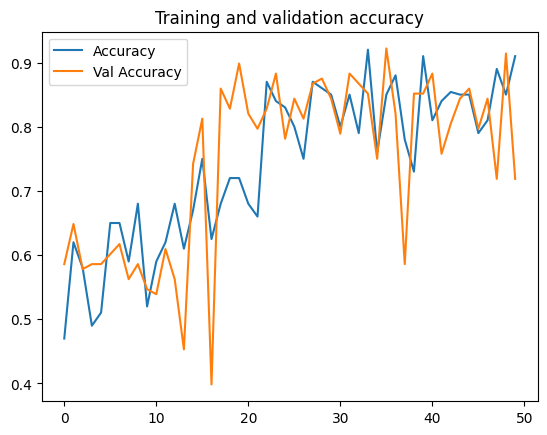

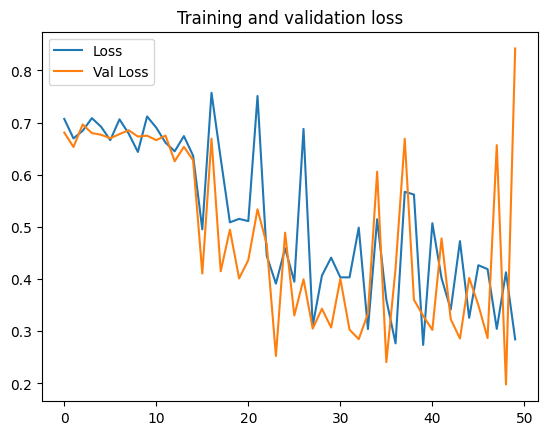

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))


# Plot training and validation accuracy per epoch
plt.plot(epochs, acc,label='Accuracy')
plt.plot(epochs, val_acc,label="Val Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss,label="Loss")
plt.plot(epochs, val_loss,label="Val Loss")
plt.title('Training and validation loss')
plt.legend()

1/1 [==============================] - 0s 29ms/step
Prediction: 0.19190307


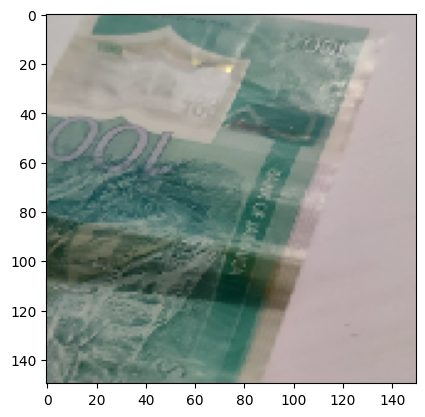

In [ ]:
image_path=validation_new_dir+'/'+validation_new_fnames[36]

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as PILImage
import numpy as np

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(image_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
imgplot = plt.imshow(array_to_img(x))


#pil_image = PILImage.open(image_path)
#target_size = (150, 150)
#pil_image_resized = pil_image.resize(target_size)
rescaled_image = x / 255.0

x_ = np.reshape(rescaled_image, [1, 150, 150, 3])

print("Prediction: "+ str(model_m.predict(x_)[0][0]))

#x=img_to_array(pil_image_resized)
#image_array = np.array(pil_image_resized)
#normalized_image_array = image_array / 255.0


Congratulations! Using feature extraction and fine-tuning, you've built an image classification model that can identify cats vs. dogs in images with over 90% accuracy.

In [ ]:
model_m.save('/content/drive/My Drive/Colab Notebooks/COMP6125 (2023)/Lab Exercises/Assignment 3/Project_Folder/models/model_without_fine_tune.keras') #tensor_flow

In [ ]:
model_m.save('/content/drive/My Drive/Colab Notebooks/COMP6125 (2023)/Lab Exercises/Assignment 3/Project_Folder/models/model_without_fine_tune.h5',save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Clean Up

Run the following cell to terminate the kernel and free memory resources:

In [ ]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)